In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
t=np.arange(0,1500)
x=np.sin(0.02*t)+np.random.rand(1500)*2


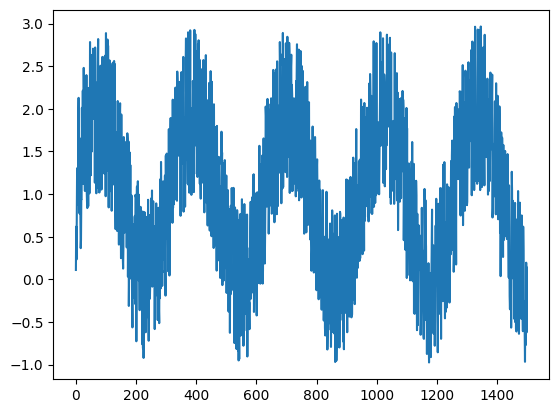

In [ ]:
plt.plot(x)

In [ ]:
# Feature Engineering, Statistical analysiss

In [ ]:
train,test = x[0:1000],x[1000:]

In [ ]:
def convert_data(data,step):
  X,Y = [],[]
  for i in range(len(data)-step):
    d=i+step

    X.append(data[i:d,])
    Y.append(data[d,])
    #print(i,d)

  return np.array(X),np.array(Y)



In [34]:
def convert_data_extra(data,x_step,y_step):
  X,Y = [],[]
  for i in range(len(data)-x_step-y_step+1):
    d=i+x_step

    X.append(data[i:d])
    Y.append(data[d:d+y_step])

  return np.array(X),np.array(Y)

In [35]:
x_step=3
y_step=2
trainX,trainY=convert_data_extra(train,x_step,y_step)
testX,testY=convert_data_extra(test,x_step,y_step)

In [36]:
trainX.shape,testX.shape

((996, 3), (496, 3))

In [ ]:
stepx=10
trainX,trainY=convert_data(train,step)
testX,testY=convert_data(test,step)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
trainX.shape,testX.shape

((990, 10), (490, 10))

In [ ]:
trainX=np.reshape(trainX,(trainX.shape[0],trainX.shape[1],1))
testX=np.reshape(testX,(testX.shape[0],testX.shape[1],1))

In [ ]:
trainX.shape,testX.shape

((990, 10, 1), (490, 10, 1))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,SimpleRNN

model = Sequential()
#model.add(SimpleRNN(units=64,activation='tanh',input_shape=(None,1)))
model.add(SimpleRNN(units=64,activation='tanh'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='rmsprop')

In [ ]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
history = model.fit(trainX,trainY,epochs=100,batch_size=16)

Epoch 1/100
62/62 [==============================] - 2s 3ms/step - loss: 0.4713
Epoch 2/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4159
Epoch 3/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4038
Epoch 4/100
62/62 [==============================] - 0s 4ms/step - loss: 0.4023
Epoch 5/100
62/62 [==============================] - 0s 4ms/step - loss: 0.3940
Epoch 6/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3955
Epoch 7/100
62/62 [==============================] - 0s 4ms/step - loss: 0.3842
Epoch 8/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3845
Epoch 9/100
62/62 [==============================] - 0s 4ms/step - loss: 0.3873
Epoch 10/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3727
Epoch 11/100
62/62 [==============================] - 0s 3ms/step - loss: 0.3725
Epoch 12/100
62/62 [==============================] - 0s 4ms/step - loss: 0.3750
Epoch 13/100
62/62 [=================

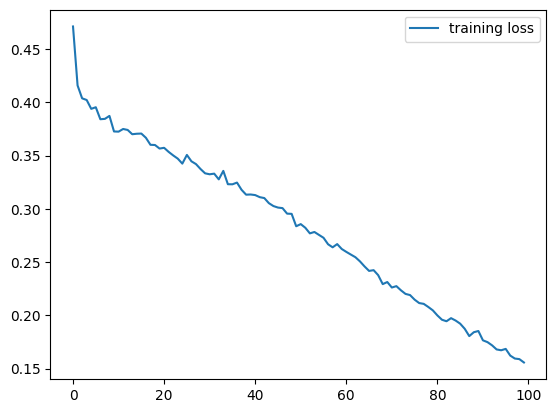

In [ ]:
loss=history.history['loss']
#val_loss=history.history['val_loss']
plt.plot(loss,label='training loss')
#plt.plot(val_loss,label='validation loss')
plt.legend()

In [ ]:
# epoch 100
# batch_size 16

# history -> loss plot
# modele.evaluate(trainX,trainY)


In [ ]:
score=model.evaluate(trainX,trainY)
score

31/31 [==============================] - 0s 2ms/step - loss: 0.1355


0.13554151356220245

In [ ]:
train_preds=model.predict(trainX)
test_preds=model.predict(testX)
preds=np.concatenate((train_preds,test_preds),axis=0)

16/16 [==============================] - 0s 2ms/step


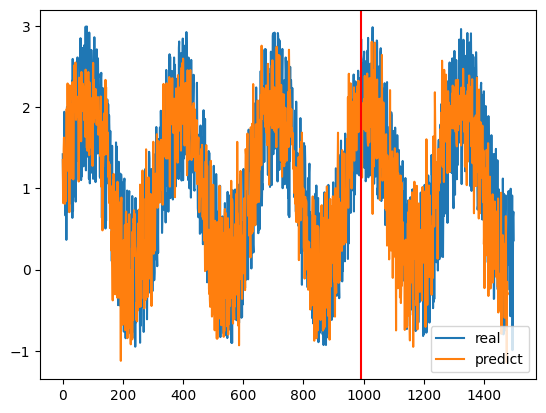

In [ ]:
plt.plot(x,label='real')
plt.plot(preds,label='predict')
plt.legend()
plt.axvline(len(trainX),c='r')
